In [8]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interp2d

### Luminosity of each emission

In [9]:
L_ly=1.6876302e44*u.erg/u.s
L_heii=6.2524353e42*u.erg/u.s
L_civ=1.1083173e43*u.erg/u.s
L_h=7.1065225e43*u.erg/u.s

### Read data

In [17]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
ra=np.genfromtxt(dic+'x_flux.txt')
dec=np.genfromtxt(dic+'y_flux.txt')

ly_flux=np.genfromtxt(dic+'ly_flux.txt')*1e-17
heii_flux=np.genfromtxt(dic+'heii_flux.txt')*1e-17
civ_flux=np.genfromtxt(dic+'civ_flux.txt')*1e-17
civ_flux=civ_flux[40:300,50:]
heii_flux=heii_flux[40:300,50:]
ly_flux=ly_flux[40:300,50:]
ra=ra[40:300]
dec=dec[50:]

h_alpha=np.genfromtxt(dic+'H-alpha_intensity.txt')
h_alpha_ra=np.genfromtxt(dic+'H-alpha_ra.txt')
h_alpha_dec=np.genfromtxt(dic+'H-alpha_dec.txt')
# h_alpha=h_alpha[::-1]

In [11]:
def interpolate_grid(x,y,img,xnew,ynew,method='linear'):
    
    interfunc=interp2d(y,x,img,kind=method)
    img_inter=interfunc(ynew,xnew)
    return img_inter

### interpolate the images to make them on the same grid

In [18]:
ranew=np.linspace(ra.min(),ra.max(),400)
decnew=np.linspace(dec.min(),dec.max(),400)

#interpolate the image
ly_flux_new=interpolate_grid(ra,dec,ly_flux,ranew,decnew)
# ly_flux_new=np.rot90(ly_flux_new)[::-1]
heii_flux_new=interpolate_grid(ra,dec,heii_flux,ranew,decnew)
civ_flux_new=interpolate_grid(ra,dec,civ_flux,ranew,decnew)
heii_flux_new=heii_flux_new.T
civ_flux_new=civ_flux_new.T
h_alpha_new=interpolate_grid(h_alpha_dec,h_alpha_ra,h_alpha,ranew,decnew)

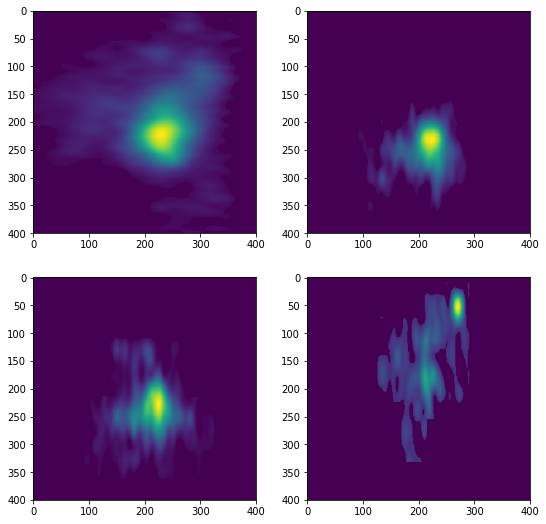

In [19]:
fig,ax=plt.subplots(2,2)
ax=ax.flatten()
ax[0].imshow(ly_flux_new)
ax[1].imshow(heii_flux_new)
ax[2].imshow(civ_flux_new)
ax[3].imshow(h_alpha_new)
plt.rcParams['figure.figsize'] = [9,9]
plt.show()

In [7]:
h_alpha_new_b=h_alpha_new.copy()
ly_flux_new_b=ly_flux_new.copy()
ly_flux_new_b[ly_flux_new_b<1e-20]=1000
h_alpha_new_b[h_alpha_new_b<1e-19]=1000
heii_h_alpha=heii_flux_new/h_alpha_new_b
civ_h_alpha=civ_flux_new/h_alpha_new_b
h_ly=h_alpha_new/ly_flux_new_b
# heii_h_alpha[heii_h_alpha>5]=0
# civ_h_alpha[civ_h_alpha>5]=0
# h_ly[h_ly>5]=0

In [7]:
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
np.savetxt(savdic+'heii_new.txt',heii_flux_new)
np.savetxt(savdic+'civ_new.txt',civ_flux_new)
np.savetxt(savdic+'h_alpha_new.txt',h_alpha_new)
np.savetxt(savdic+'ly_flux_new.txt',ly_flux_new)

In [9]:
origin_world=np.array([220.3520886,40.05269183])
sources_list=np.array([[220.3517351,40.05269063],
                       [220.3521004,40.05267509],
                       [220.3519736,40.05221132],
                       [220.3520722,40.05297709],
                       
                       [220.3531717,40.05223288],
                       [220.3497255,40.05104434],
                       [220.3492992,40.05225575],
                       [220.3499296,40.05351636],
                       [220.3525,40.0545]])*u.deg
sources_list[:,0]=sources_list[:,0]-0.0002*u.deg
source_name=['G-2','G-3','G-4','G-6','G-5','G-1']
source_name_coor=np.array([[220.3520722,40.05297709],[220.3531717,40.05223288],
                           [220.3497255,40.05104434],[220.3492992,40.05225575],
                           [220.3499296,40.05351636],[220.3525,40.0545]])*u.deg
delta_sources=(sources_list-origin_world*u.deg).to(u.arcsec).value
delta_source_name_coor=(source_name_coor-origin_world*u.deg).to(u.arcsec).value

In [11]:
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
np.savetxt(savdic+'heii_h_alpha.txt',heii_h_alpha)
np.savetxt(savdic+'civ_h_alpha.txt',civ_h_alpha)
np.savetxt(savdic+'x_h_ratio.txt',ranew)
np.savetxt(savdic+'y_h_ratio.txt',decnew)

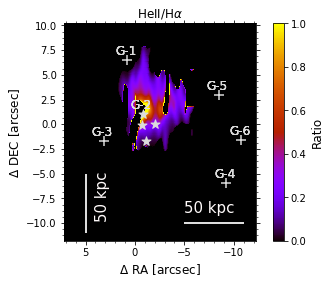

In [10]:
fig,ax=plt.subplots(1,1)
img=ax.pcolormesh(ranew,decnew,heii_h_alpha,cmap='gnuplot',vmax=1,vmin=0)
cbar=plt.colorbar(img,ax=ax)
cbar.ax.set_ylabel(r'Ratio',fontsize=12)
for k in range(4):
    ax.scatter(delta_sources[k,0],delta_sources[k,1],marker='*',color='gainsboro',s=90)
for k in range(4,delta_sources.shape[0]):
    ax.scatter(delta_sources[k,0],delta_sources[k,1],marker='+',color='gainsboro',s=90)
    for k in range(len(source_name)):
        ax.annotate(source_name[k],xy=(delta_source_name_coor[k,0],delta_source_name_coor[k,1]),
                    xytext=(-5,5),textcoords="offset points",color='gainsboro',fontsize=12)
ax.minorticks_on()
ax.set_title(r'HeII/H$\alpha$')
ax.set_xlabel(r'$\Delta$ RA [arcsec]',fontsize=12)
ax.set_ylabel(r'$\Delta$ DEC [arcsec]',fontsize=12)
ax.set_aspect('equal')
ax.tick_params(axis='both', which='both',top=True,right=True)
ax.invert_xaxis()
ax.vlines(x=5,ymin=-11,ymax=-11+6.,lw=2,color='gainsboro')
ax.text(4,-6,'50 kpc',color='snow',fontsize=15,rotation=90)
ax.hlines(y=-10,xmin=-5,xmax=-11.,lw=2,color='gainsboro')
ax.text(-5,-9,'50 kpc',color='snow',fontsize=15)
plt.show()
# savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
# plt.savefig(savdic+'HeII_H_ratio.png',dpi=300)

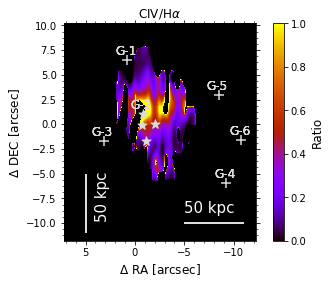

In [60]:
fig,ax=plt.subplots(1,1)
img=ax.pcolormesh(ranew,decnew,civ_h_alpha,cmap='gnuplot',vmax=1,vmin=0)
cbar=plt.colorbar(img,ax=ax)
cbar.ax.set_ylabel(r'Ratio',fontsize=12)
for k in range(4):
    ax.scatter(delta_sources[k,0],delta_sources[k,1],marker='*',color='gainsboro',s=90)
for k in range(4,delta_sources.shape[0]):
    ax.scatter(delta_sources[k,0],delta_sources[k,1],marker='+',color='gainsboro',s=90)
    for k in range(len(source_name)):
        ax.annotate(source_name[k],xy=(delta_source_name_coor[k,0],delta_source_name_coor[k,1]),
                    xytext=(-5,5),textcoords="offset points",color='gainsboro',fontsize=12)
ax.minorticks_on()
ax.set_title(r'CIV/H$\alpha$')
ax.set_xlabel(r'$\Delta$ RA [arcsec]',fontsize=12)
ax.set_ylabel(r'$\Delta$ DEC [arcsec]',fontsize=12)
ax.set_aspect('equal')
ax.tick_params(axis='both', which='both',top=True,right=True)
ax.invert_xaxis()
ax.vlines(x=5,ymin=-11,ymax=-11+6.,lw=2,color='gainsboro')
ax.text(4,-6,'50 kpc',color='snow',fontsize=15,rotation=90)
ax.hlines(y=-10,xmin=-5,xmax=-11.,lw=2,color='gainsboro')
ax.text(-5,-9,'50 kpc',color='snow',fontsize=15)
# plt.show()
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
plt.savefig(savdic+'CIV_H_ratio.png',dpi=300)

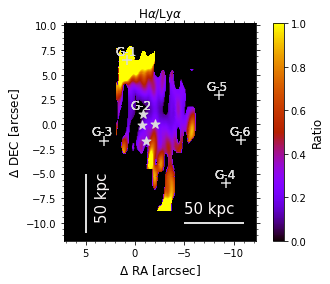

In [58]:
fig,ax=plt.subplots(1,1)
img=ax.pcolormesh(ranew,decnew,h_ly,cmap='gnuplot',vmax=1,vmin=0)
cbar=plt.colorbar(img,ax=ax)
cbar.ax.set_ylabel(r'Ratio',fontsize=12)
for k in range(4):
    ax.scatter(delta_sources[k,0],delta_sources[k,1],marker='*',color='gainsboro',s=90)
for k in range(4,delta_sources.shape[0]):
    ax.scatter(delta_sources[k,0],delta_sources[k,1],marker='+',color='gainsboro',s=90)
    for k in range(len(source_name)):
        ax.annotate(source_name[k],xy=(delta_source_name_coor[k,0],delta_source_name_coor[k,1]),
                    xytext=(-5,5),textcoords="offset points",color='gainsboro',fontsize=12)
ax.minorticks_on()
ax.set_title(r'H$\alpha$/Ly$\alpha$')
ax.set_xlabel(r'$\Delta$ RA [arcsec]',fontsize=12)
ax.set_ylabel(r'$\Delta$ DEC [arcsec]',fontsize=12)
ax.set_aspect('equal')
ax.tick_params(axis='both', which='both',top=True,right=True)
ax.invert_xaxis()
ax.vlines(x=5,ymin=-11,ymax=-11+6.,lw=2,color='gainsboro')
ax.text(4,-6,'50 kpc',color='snow',fontsize=15,rotation=90)
ax.hlines(y=-10,xmin=-5,xmax=-11.,lw=2,color='gainsboro')
ax.text(-5,-9,'50 kpc',color='snow',fontsize=15)
# plt.show()
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
plt.savefig(savdic+'H_alpha_ly_alpha_ratio.png',dpi=300)